In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib as plt

# Packages for text pre-processing 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Package for splitting the input data
from sklearn.model_selection import train_test_split

# Metrics to evaluate model performance
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Packages for building an ML model
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
# Dataset - IMDB movie reviews dataset from Kaggle
# where each review tagged as positive or negative
imdb_df = pd.read_csv('./datasets/IMDB Dataset.csv', encoding='ISO-8859-1')
imdb_df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
imdb_df.shape

(50000, 2)

In [4]:
imdb_df = imdb_df.sample(10000, random_state=1, replace=False) # sampling data for quicker analysis
imdb_df.describe()

,review,sentiment
count,10000,10000
unique,9981,2
top,How has this piece of crap stayed on TV this l...,negative
freq,3,5044


In [5]:
X = imdb_df['review']
y = imdb_df['sentiment']

In [6]:
X.head()

26247    With No Dead Heroes you get stupid lines like ...
35067    I thought maybe... maybe this could be good. A...
34590    An elite American military team which of cours...
16668    Ridiculous horror film about a wealthy man (Jo...
12196    Well, if you are one of those Katana's film-nu...
Name: review, dtype: object

In [7]:
y.head()

26247    negative
35067    negative
34590    negative
16668    negative
12196    positive
Name: sentiment, dtype: object

In [8]:
# helper function
def summarize_classification(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred, normalize=True)
    num_acc = accuracy_score(y_test, y_pred, normalize=False)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    print('Length of the testing data: ', len(y_test))
    print('Accuracy count: ', num_acc)
    print('Accuracy score: ', acc)
    print('Precision score: ', precision)
    print('Recall score: ', recall)
    #print('Confusion matrix:\n', cm)
    cm_display = ConfusionMatrixDisplay(cm).plot()

In [9]:
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer()),
    ('tfidf_transformer', TfidfTransformer()),
    ('classifier', LogisticRegression(solver='lbfgs', max_iter=10000))
])

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('tfidf_transformer', TfidfTransformer()),
                ('classifier', LogisticRegression(max_iter=10000))])

In [12]:
y_pred = pipeline.predict(x_test)

Length of the testing data:  2000
Accuracy count:  1750
Accuracy score:  0.875
Precision score:  0.8755179355838258
Recall score:  0.875


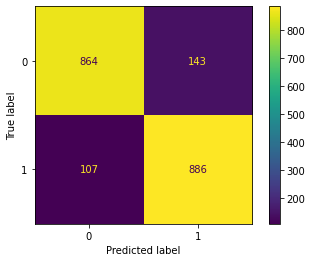

In [13]:
summarize_classification(y_test, y_pred)